Step 1: Download the .csv file, click the folder on the left, and upload the file

https://drive.google.com/file/d/18AkuILl5M_yi22O8Wi3BqcTF3uG25OBD/view?usp=sharing

Step 2: Import the necessary modules

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

Step 3: Load the data

In [22]:
allgames = pd.read_csv("nba.csv").drop(columns=['Unnamed: 0'])

In [23]:
display(allgames) # This is what the data looks like!

,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_ID,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,PTS_AWAY,...,FTM_HOME_rolling,FTA_HOME_rolling,FT_PCT_HOME_rolling,OREB_HOME_rolling,DREB_HOME_rolling,REB_HOME_rolling,AST_HOME_rolling,TOV_HOME_rolling,PLUS_MINUS_HOME_rolling,W
0,22019,1610612749,MIL,Milwaukee Bucks,21900270,2019-11-29,MIL @ CLE,W,239,119,...,19.2,23.8,0.8024,11.0,34.8,45.8,19.0,16.0,-7.6,0
1,22019,1610612765,DET,Detroit Pistons,21900299,2019-12-03,DET @ CLE,W,241,127,...,16.8,21.6,0.7404,10.4,35.4,45.8,21.8,15.2,-7.2,0
2,22019,1610612753,ORL,Orlando Magic,21900321,2019-12-06,ORL @ CLE,W,240,93,...,14.6,19.6,0.7082,10.6,34.8,45.4,22.2,15.0,-10.0,0
3,22019,1610612745,HOU,Houston Rockets,21900356,2019-12-11,HOU @ CLE,W,241,116,...,10.8,15.2,0.6856,10.8,33.2,44.0,22.8,15.6,-12.4,0
4,22019,1610612766,CHA,Charlotte Hornets,21900407,2019-12-18,CHA @ CLE,L,242,98,...,9.2,12.8,0.6806,10.2,32.0,42.2,23.8,16.6,-13.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12504,22023,1610612764,WAS,Washington Wizards,22300971,2024-03-16,WAS @ CHI,L,241,98,...,16.4,20.6,0.7958,12.2,38.0,50.2,26.4,13.2,12.6,1
12505,22023,1610612764,WAS,Washington Wizards,22301037,2024-03-25,WAS @ CHI,W,239,107,...,16.8,21.4,0.7886,12.8,37.8,50.6,26.6,14.6,13.4,0
12506,22023,1610612764,WAS,Washington Wizards,22301137,2024-04-07,WAS @ TOR,L,239,122,...,18.8,24.0,0.7794,12.4,37.2,49.6,26.2,14.6,10.6,1
12507,22023,1610612764,WAS,Washington Wizards,22301152,2024-04-09,WAS @ MIN,L,240,121,...,20.6,26.0,0.7960,10.8,38.4,49.2,28.8,14.6,12.6,1


Step 4: Find the variables that correlate to winning

In [24]:
# These are the variables being used in the model!

away_cols = ['PTS_AWAY', 'FGM_AWAY',
           'FGA_AWAY', 'FG_PCT_AWAY', 'FG3M_AWAY', 'FG3A_AWAY', 'FG3_PCT_AWAY', 'FTM_AWAY', 'FTA_AWAY',
           'FT_PCT_AWAY', 'OREB_AWAY', 'DREB_AWAY', 'REB_AWAY', 'AST_AWAY',
           'TOV_AWAY', 'PLUS_MINUS_AWAY']
home_cols = ['PTS_HOME', 'FGM_HOME', 'FGA_HOME',
           'FG_PCT_HOME', 'FG3M_HOME', 'FG3A_HOME', 'FG3_PCT_HOME', 'FTM_HOME', 'FTA_HOME',
           'FT_PCT_HOME', 'OREB_HOME', 'DREB_HOME', 'REB_HOME', 'AST_HOME',
           'TOV_HOME', 'PLUS_MINUS_HOME']

# Adds "_rolling" to the end of each name

new_cols_home = [f"{c}_rolling" for c in home_cols]
new_cols_home.append(home_cols[-1])
new_cols_away = [f"{c}_rolling" for c in away_cols]
new_cols_away.append(away_cols[-1])

# List of all variables that will be used in the model

pred_cols = new_cols_away+new_cols_home

Step 5: Train the model

Accuracy: 0.9995203836930455
Precision: 1.0


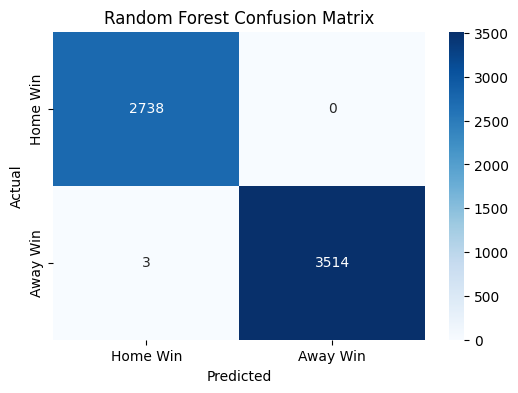

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
all_train, all_test = train_test_split(allgames, test_size=0.5, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(all_train[pred_cols], all_train["W"])

# Make predictions on the testing set
rf_preds = rf_model.predict(all_test[pred_cols])

# Calculate accuracy and precision
rf_accuracy = accuracy_score(all_test["W"], rf_preds)
rf_precision = precision_score(all_test["W"], rf_preds)

# Print accuracy and precision
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")

# Generate confusion matrix
rf_cm = confusion_matrix(all_test["W"], rf_preds)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Home Win', 'Away Win'], yticklabels=['Home Win', 'Away Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

Step 6: Use the model

In [26]:
def predictor(away_id, home_id):
    # Use the trained Random Forest model
    model = rf_model

    # Get the past data for the home and away teams
    df_home = allgames[allgames['TEAM_ID_HOME'] == home_id]  # Gets all the home games for the home team
    df_away = allgames[allgames['TEAM_ID_AWAY'] == away_id]  # Gets all the away games for the away team

    # Get the rolling averages and last game stats for the home and away teams
    home_stats = list(df_home.loc[:, new_cols_home[:-1]].iloc[-1])
    home_pm = df_home['PLUS_MINUS_HOME'].iloc[-1]
    home_stats.append(home_pm)

    away_stats = list(df_away.loc[:, new_cols_away[:-1]].iloc[-1])
    away_pm = df_away['PLUS_MINUS_AWAY'].iloc[-1]
    away_stats.append(away_pm)

    # Combine the stats into a single list for prediction
    new_stats = [away_stats + home_stats]

    # Create a DataFrame for the new game data
    df_predict = pd.DataFrame(new_stats, columns=pred_cols)

    # Predict the probability of the home and away team winning using the Random Forest model
    probabilities = model.predict_proba(df_predict)[0]
    predicted_winner = model.predict(df_predict)[0]

    # Probability of the home team winning
    home_win_prob = probabilities[1]  # Index 1 corresponds to the probability of home team winning
    away_win_prob = probabilities[0]  # Index 0 corresponds to the probability of away team winning

    # Determine the winner and return the prediction with win probabilities
    if predicted_winner == 1:
        winProb = str((home_win_prob * 100).round(1)) + '%'
        return f'The home team has a {winProb} chance of winning!'
    else:
        winProb = str((away_win_prob * 100).round(1)) + '%'
        return f'The away team has a {winProb} chance of winning!'

In [27]:
cavs = 1610612739
clippers = 1610612746
knicks = 1610612752
celtics = 1610612738
hawks = 1610612737
nets = 1610612751
hornets = 1610612766
bulls = 1610612741
mavericks = 1610612742
nuggets = 1610612743
pistons = 1610612765
warriors = 1610612744
rockets = 1610612745
pacers = 1610612754
lakers = 1610612747
grizzlies = 1610612763
heat = 1610612748
bucks = 1610612749
timberwolves = 1610612750
pelicans = 1610612740
thunder = 1610612760
magic = 1610612753
sixers = 1610612755
suns = 1610612756
blazers = 1610612757
kings = 1610612758
spurs = 1610612759
raptors = 1610612761
jazz = 1610612762
wizards = 1610612764

In [28]:
predictor(blazers, sixers) # AWAY vs. HOME

'The home team has a 98.0% chance of winning!'

Step 7: Explore the model

Can you make any improvements/observations? Try adding/removing columns or engineering your own!